There is a game dungeon comprised of n x n rooms arranged in a grid.

You are given a 2D array fruits of size n x n, where fruits[i][j] represents the number of fruits in the room (i, j). Three children will play in the game dungeon, with initial positions at the corner rooms (0, 0), (0, n - 1), and (n - 1, 0).

The children will make exactly n - 1 moves according to the following rules to reach the room (n - 1, n - 1):

    The child starting from (0, 0) must move from their current room (i, j) to one of the rooms (i + 1, j + 1), (i + 1, j), and (i, j + 1) if the target room exists.
    The child starting from (0, n - 1) must move from their current room (i, j) to one of the rooms (i + 1, j - 1), (i + 1, j), and (i + 1, j + 1) if the target room exists.
    The child starting from (n - 1, 0) must move from their current room (i, j) to one of the rooms (i - 1, j + 1), (i, j + 1), and (i + 1, j + 1) if the target room exists.

When a child enters a room, they will collect all the fruits there. If two or more children enter the same room, only one child will collect the fruits, and the room will be emptied after they leave.

Return the maximum number of fruits the children can collect from the dungeon.

 

Example 1:

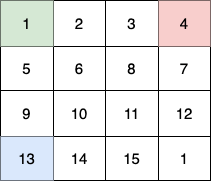

Input: fruits = [[1,2,3,4],[5,6,8,7],[9,10,11,12],[13,14,15,16]]

Output: 100

Explanation:

In this example:

    The 1st child (green) moves on the path (0,0) -> (1,1) -> (2,2) -> (3, 3).
    The 2nd child (red) moves on the path (0,3) -> (1,2) -> (2,3) -> (3, 3).
    The 3rd child (blue) moves on the path (3,0) -> (3,1) -> (3,2) -> (3, 3).

In total they collect 1 + 6 + 11 + 16 + 4 + 8 + 12 + 13 + 14 + 15 = 100 fruits.

Example 2:

Input: fruits = [[1,1],[1,1]]

Output: 4

Explanation:

In this example:

    The 1st child moves on the path (0,0) -> (1,1).
    The 2nd child moves on the path (0,1) -> (1,1).
    The 3rd child moves on the path (1,0) -> (1,1).

In total they collect 1 + 1 + 1 + 1 = 4 fruits.

 

Constraints:

    2 <= n == fruits.length == fruits[i].length <= 1000
    0 <= fruits[i][j] <= 1000



In [ ]:
class Solution:
    def maxCollectedFruits(self, fruits: List[List[int]]) -> int:
        n = len(fruits)
        ans = sum(fruits[i][i] for i in range(n))

        def dp():
            prev = [float("-inf")] * n
            curr = [float("-inf")] * n
            prev[n - 1] = fruits[0][n - 1]
            for i in range(1, n - 1):
                for j in range(max(n - 1 - i, i + 1), n):
                    best = prev[j]
                    if j - 1 >= 0:
                        best = max(best, prev[j - 1])
                    if j + 1 < n:
                        best = max(best, prev[j + 1])
                    curr[j] = best + fruits[i][j]
                prev, curr = curr, prev
            return prev[n - 1]

        ans += dp()

        for i in range(n):
            for j in range(i):
                fruits[i][j], fruits[j][i] = fruits[j][i], fruits[i][j]

        ans += dp()
        return ans